In [2]:
using Plots
include("polyfit_function.jl")
include("Lagrange_interpolation.jl")

Lagrange (generic function with 1 method)

In [4]:
function BE(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    y = zeros(N + 1, 1)
    y[1] = y0

    for i in 1:N
       ynew=y[i]+h*f(t[i], y[i])
       y[i+1]= y[i]+h*f(t[i+1], ynew)
    end

    return t, y
end

BE (generic function with 1 method)

convergence order = 1.0048512861453875


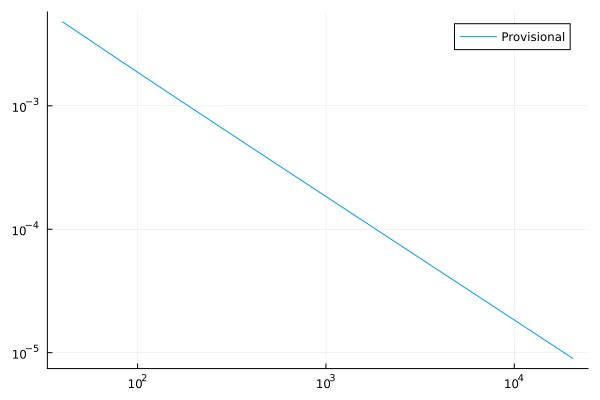

In [5]:
# Convergence Analysis of Trapezoidal method
y0 = 1.0
lambda=-1
tspan=[0 1.0]
K = 10
err = zeros(K, 1)
ns=zeros(K, 1)
for k in 1:K
    N = 20* 2^k
    ns[k]=N
    h = (tspan[2] - tspan[1]) / N
    f(t, y) = lambda * y
    (t, y) = BE(f, tspan, y0, N)
    exact = y0 * exp.(lambda * t)
    
    # Storing errors
    for i in 1:K+1
        err[k] = norm(exact[N+1] .- y[N+1])
    end
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:, 1]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:, 1],xaxis=:log, yaxis=:log, label="Provisional")
display(plot!(legend=:topright))

In [6]:
function BE_hard(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    y = zeros(N + 1, 1)
    y[1] = y0

    for i in 1:N
       #ynew=y[i]+h*f(t[i], y[i])
       y[i+1]= y[i]/(1-lambda*h)
    end

    return t, y
end

BE_hard (generic function with 1 method)

convergence order = 0.9987298803978367


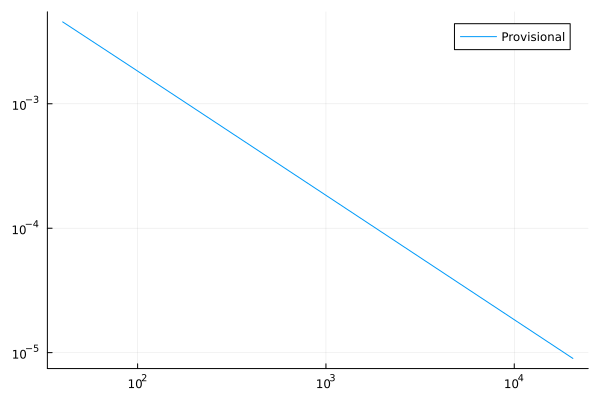

In [7]:
# Convergence Analysis of Trapezoidal method
y0 = 1.0
lambda=-1
tspan=[0 1.0]
K = 10
err = zeros(K, 1)
ns=zeros(K, 1)
for k in 1:K
    N = 20* 2^k
    ns[k]=N
    h = (tspan[2] - tspan[1]) / N
    f(t, y) = lambda * y
    (t, y) = BE_hard(f, tspan, y0, N)
    exact = y0 * exp.(lambda * t)
    
    # Storing errors
    for i in 1:K+1
        err[k] = norm(exact[N+1] .- y[N+1])
    end
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:, 1]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:, 1],xaxis=:log, yaxis=:log, label="Provisional")
display(plot!(legend=:topright))

In [8]:
function trapz(f, tspan,lambda, y0, N)
    h = (tspan[2] - tspan[1]) / N
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    y = zeros(N + 1, 1)
    y[1] = y0
    #k1=h*f(t[1], y[1])
    #k2=h*f(t[1]+h, y[1]+k1)
    #y[2]=y[1]+0.5*(k1+k2)
    for i in 1:N
        y[i + 1] = (y[i] + 0.5*h*lambda*y[i])/(1-0.5*h*lambda)
    end

    return t, y
end

trapz (generic function with 1 method)

convergence order = 1.9993325007731213


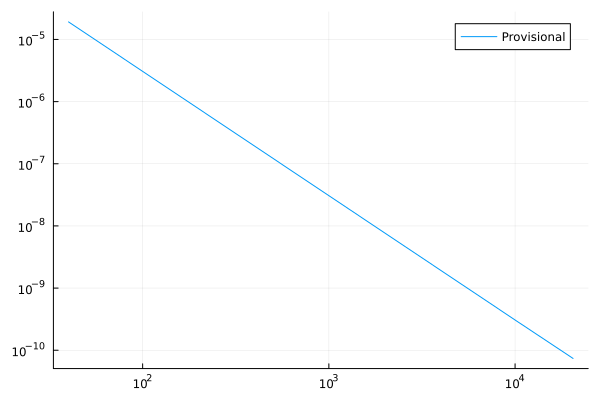

In [10]:
# Convergence Analysis of Trapezoidal method
y0 = 1.0
lambda=-1
tspan=[0 1.0]
K = 10
err = zeros(K, 1)
ns=zeros(K, 1)
for k in 1:K
    N = 20* 2^k
    ns[k]=N
    h = (tspan[2] - tspan[1]) / N
    f(t, y) = lambda * y
    (t, y) = trapz(f, tspan,lambda, y0, N)
    exact = y0 * exp.(lambda * t)
    
    # Storing errors
    for i in 1:K+1
        err[k] = norm(exact[N+1] .- y[N+1])
    end
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:, 1]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:, 1],xaxis=:log, yaxis=:log, label="Provisional")
display(plot!(legend=:topright))

In [15]:
function trapz_new(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    y = zeros(N + 1, 1)
    y[1] = y0
    
    for i in 1:N
        ynew1=y[i]+h*f(t[i], y[i])
       ynew2= y[i]+h*f(t[i+1], ynew1)
        y[i+1]=y[i]+0.5*(f(t[i+1], ynew2)+ f(t[i], y[i]))
    end

    return t, y
end

trapz_new (generic function with 1 method)

convergence order = 1.4545656476923943e-17


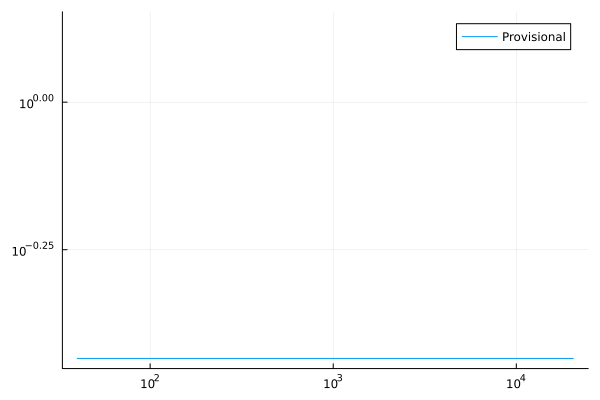

In [16]:
# Convergence Analysis of Trapezoidal method
y0 = 1.0
lambda=-1
tspan=[0 1.0]
K = 10
err = zeros(K, 1)
ns=zeros(K, 1)
for k in 1:K
    N = 20* 2^k
    ns[k]=N
    h = (tspan[2] - tspan[1]) / N
    f(t, y) = lambda * y
    (t, y) = trapz_new(f, tspan, y0, N)
    exact = y0 * exp.(lambda * t)
    
    # Storing errors
    for i in 1:K+1
        err[k] = norm(exact[N+1] .- y[N+1])
    end
end

# Compute order of convergence and error plot
pdeg = polyfit(log10.(ns[:]), log10.(err[:, 1]),1)
print("convergence order = ",abs(pdeg[2]),"\n") 
plot(ns, err[:, 1],xaxis=:log, yaxis=:log, label="Provisional")
display(plot!(legend=:topright))